# Manage Experiments

## Agenda

* word2vec
* Embedding visualization
* Structure your TensorFlow model
* Variable sharing
* Manage experiments
* Autodiff


word2vec에 관한 자세한 내용은 cs224의 강의 슬라이드를 참고하면 좋다. [cs224, word2vec](http://web.stanford.edu/class/cs224n/lectures/lecture2.pdf)



## cs224 슬라이드 정리

단어의 의미를 어떻게 나타낼 수 있을까?

* word vector에 관한 내용 정리 참고 사이트

    http://dsp.yonsei.ac.kr/139926

    https://brunch.co.kr/@goodvc78/16

가장 보편적인 방법은 단어를 쓰고, 해당 단어의 뜻을 word나 sign으로 표현하는 것이다. 

<center> signifier	(symbol)	⟺ signified	(idea	or	thing) => "denotation"<center>

### Wordnet

comPuter code에서는 Wordnet library로 제공하고 있다. 이를 이용해서 주어진 단어의 동의어나 유의어로 나타낼 수 있다.

하지만, 미묘한 차이가 있을 수도 있으며, 일부가 결과로 나오지 않는 문제가 있다.

가장 큰 단점으로 이러한 데이터셋은 작성자의 주관(Subective)가 들어가 있으며, 초기 데이터셋을 만들기 위해서 많은 인간의 노동력(human labor)이 필요하다.

### Discrete symbols

고전 NLP에서는 단어를 이산기호(discrete symbols)로 나타내는 방법을 사용했다.(One-hot 방식을 이용한다)

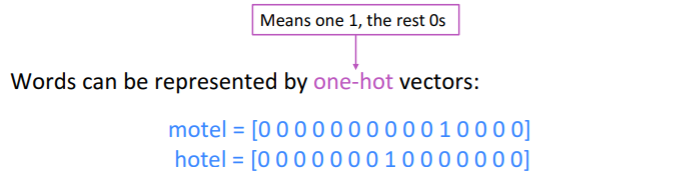

이렇게 만든 vector의 차원(dimension)은 단어의 갯수와 일치하게 된다.



단점

1. 사용자가 찾고자 하는 단어가 vector에 포함되어 있지 않으면, 찾을 수 없다
2. 모든 vector가 직교(orthogonal)하고 있어 서로간의 유사도(Similarity)를 비교할 수가 없다.

### Representing words by their context

core idea : 단어의 의미는 주변에 어떠한 단어들이 주로 나타나는가에 따라서 부여된다.(A word's meaning is given by the words that frequently apper close-by)

참고사이트를 살펴보면, 언어학적 이론 Distributional Hypothesis‘을 기초로 한다는 내용도 있다.

문장(context) 안에서 단어 a가 등장한다면, 이문장은 a 주변에 나타나는 단어(Word)의 집합이다.

단어 W에 대한 여러개의 문장(context)를 사용해서 W(representation of w)를 나타내도록한다.

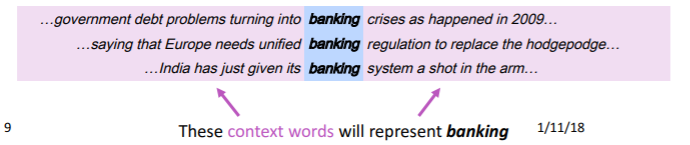

### Word vector

각각의 단어에 대해서 dense vecotr을 만든다. 이 vector는 비슷한 문장에서 등장하는 단어 vector들과 얼마나 유사한지를 알수 있게 해준다.

we will build a dense vector for each word, chosen so that it is similar to vectors of words that appear in similar contexts.

#### Note

Word vector는 다른 말로 'Word embeddings', 'Word reprentations'라고 불린다.

### Word2vec : overview

word2vec은 word vector을 이용하여 learning하는 하나의 framwork이다. 

아이디어는 다음과 같다.

1. 다량의 말뭉치 text(large corpus of text)가 있다.
2. 고정된 단어모음(vocabulary) 안의 모든 단어(Word)는 vector로 표현이 가능하다.
3. center word c와 context(outsid) word o를 위치 t로 만들 수 있다.
4. 확률값을 이용해서 단어 vector의 유사도를 구할 수 있다.
5. 확률값을 극대화(maximize)하기 위해 단어 vector를 조정할 수 있다.

-----

natural language problem를 해결하기 위해서는 texture data를 나타내는 효과적인 방법을 찾아야 한다.

word2vec을 학습시키는 방법으로 두 가지가 있다
* Skip-gram
* CBOW

이번 장에서는 skip-gram을 이용한 word2vec을 만들어 볼 것이다.

### Softmax, Negative Sampling, and Noise Contrastive Estimation

위의 이론에서, 주변 단어들의 가능성(possible)에 대한 분포(distribution)을 얻기 위해 자주 사용되는 방법이 Softmax이다.

Softmax는 미지의 변수(arbitrary values) $X_i$를 확률분포($P_i$)에 매핑시킨다.

word2vec의 경우에는

$$Softmax(x_i) = exp(x_i) \ / \ \sum exp(x_i)$$

여기서 분포의 normalization term을 계산하기 위해서 모든 단어의 exp 값을 계산을 해야만 한다. 많은 연산을 필요로 하므로 이러한 normalization term이 계산적으로는 금지되고 있다.

이러한 bottle neck을 해소하기 위해 두가지 방법이 제시되고 있다.

* hierarchical softmax 
* sample-based softmax

 Mikolov는 skip-gram을 사용한 논문에서 negative sample 방법이 hierarchical softmax에 비해 더 빠르다는 것을 보여주기도 했다.

Negative sampling은 sample-based(샘플기반)의 접근법에 속하며, Noise Contrastive Estimation(NCE)을 간소화 시킨 방법이다. 

## Interface: How to structure your TensorFlow model

### Phase 1: assemble your graph
1. Import data (either with tf.data or with placeholders)
2. Define the weights
3. Define the inference model
4. Define loss function
5. Define optimizer


### Phase 2: execute the computation
Which is basically training your model. There are a few steps:

1. Initialize all model variables for the first time.
2. Initialize iterator / feed in the training data.
3. Execute the inference model on the training data, so it calculates for each training input example the output with the current model parameters.
4. Compute the cost
5. Adjust the model parameters to minimize/maximize the cost depending on the model.

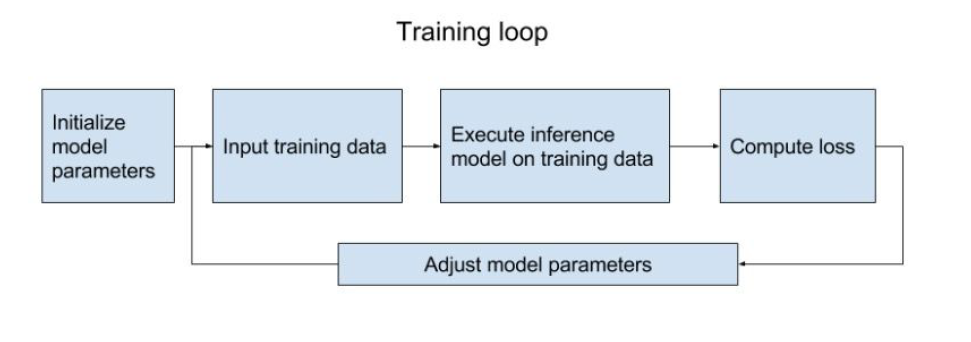

### T-SNE

tensorboard에서 시각화하는 방법 중 하나로 t-sne 이라는 방법이 등장한다.

간단하게 말하면 차원축소(dimesionality reduction)와 시각화(visualization)하는 방법론 중 하나이다.

참고 사이트 : [ratsgo, T-sne](https://ratsgo.github.io/machine%20learning/2017/04/28/tSNE/)

### Reusable models

* Define a class for your model
* Set up your model in a collection (e.g. map)

If you want to really reuse a model (without rebuilding it)

* For big models that take a long time to build, save the graph_def in a
file and then load it


## Variable sharing

참고 사이트 : [텐서플로 문서 번역, 공유 변수](https://tensorflowkorea.gitbooks.io/tensorflow-kr/content/g3doc/how_tos/variable_scope/)

### Name scope

텐서보드는 어떤 노드가 서로 비슷한지, 어떻게 그룹화해야할지 판단하지 못한다. scope를 설정하지 않고 텐서보드의 그래프를 보면 매우 복잡하고 디버깅하기 어렵게 표현되어 있다.

따라서 우리가 관련된 내용을 그룹화하기 위해서(ex. input/output과 관련된 ops, loss와 관련된 ops) 'name_scope'를 사용한다.

name_scope로 그룹화하면 텐서보드에서 node를 그룹화한 block의 형태를 볼 수 있다.

### Variable scope

변수(variable)를 선언할 때, tf.get_variable()로 선언하게 되면 먼저 변수가 있는지 없는지를 확인하게 된다.

변수가 없다면 생성을 하게 되고 변수가 이미 존재한다면 "ValueError"을 출력하게 된다.

이러한 과정에서 변수가 있어도 재사용하고 싶은 경우, Varscope에 넣게 되면 재사용이 가능하게 된다.

코드 안에서 구조상 비슷한 layer가 있다면, 이를 재사용하여 무한히 확장할 수 있게 된다.

### Graph collections

모델을 생성할때, 그래프의 몇 개의 부분에 변수를 넣을 수 있다. tf.get_collection을 사용하면 특정하는 변수 집합에 접근할 수 있다.

tf.get_collection(key, scope = None), key는 collection의 이름이며, scope는 scope 변수를 의미한다.

전체의 변수를 선택할 때는 key에 tf.GraphKeys.GLOBAL_VARIABLES 를 넣으면 된다.

train이 가능한 변수들만 보고 싶을 때는(trainable = True) tf.GraphKeys.TRAINABLE_VARIABLES 를 입력한다.

## Manage experiments

우리가 실습해봤던 코드은 금방 실행이 되지만, 실제로는 커다란 데이터를 다루고, 복잡한 모델을 학습해야하므로 많은 시간이 들게 된다.

그래서 어떠한 포인트에서 멈추고, 다시 training 시킬 수 있어야 하는 것이 중요하게 작용한다. 

또다른 문제는 실험의 결과를 복제하는 방법이다. 모델을 만드는 데 randomization을 사용하기 때문에, random factor을 제어하는 것도 중요하다.

### tf.train.Saver()

tf.train.Saver는 graph의 변수들(variables)를 binary file의 형태로 저장할 수 있게 해준다.

예를 들어, 1000 training steps 마다 variables를 저장하고 싶을 때는 다음과 같이 코드를 작성하면 된다.

In [11]:
import tensorflow as tf
#define model

#create a saver object
saver = tf.train.Saver()

# launch a session to execute the computation
with tf.Session() as sess:
    # actual training loop
    for step in range(training_steps):
        sess.run([optimizer])
        if (step+1) %  1000 == 0:
            saver.save(sess, 'checkpoint_directory/model_name' , global_step = global_step)

C:\Users\home\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


그래프를 저장하는 step을 "checkpoint"라고 부른다.

많은 수의 checkpoint를 생성하기 위해서는, training step을 "global_step"이라는 변수를 통해 나타내는 것이 좋다.

    global_step = tf . Variable ( 0 , dtype = tf . int32 , trainable = False , name = 'global_step')

이 global_step을 optimizer 안에 추가하게 되면 training step마다 1씩 증가하는 것을 인지할 수가 있다.

    optimizer = tf . train . GradientDescentOptimizer ( lr ). minimize ( loss , global_step = global_step)

그리고 현재의 변수 값(value of variables)을 저장하면 된다.

    saver . save ( sess , 'checkpoints/model-name' , global_step = global_step)

저장한 변수를 다시 불러내서 훈련(training)을 진행하고 싶을 때는, tf.train.get_checkpoint_state(directory-name) 를 이용한다.

파일명을 지정하지 않으면, 가장 마지막 모델을 불러오게 된다.

In [ ]:
ckpt = tf.train.get_checkpoint_state(checkpoint_dir='')
if ckpt and ckpt.model_checkpoint_path:
    saver.restore(sess, ckpt.model_checkpoint_path)